In [148]:
import matplotlib.pyplot as plt
import pandas as pd

## Soil texture triangle

In [149]:
# point percentage
soil_textures = {
    "Clay (Heavy)": {"Clay": 80, "Silt": 10, "Sand": 10},
    "Silty Clay": {"Clay": 50, "Silt": 40, "Sand": 10},
    "Clay": {"Clay": 50, "Silt": 20, "Sand": 30},
    "Silty Clay Loam": {"Clay": 33.5, "Silt": 46.5, "Sand": 10},
    "Clay Loam": {"Clay": 33.5, "Silt": 25, "Sand": 32.5},
    "Silt": {"Clay": 6, "Silt": 90, "Sand": 4},
    "Silt Loam": {"Clay": 13.5, "Silt": 69, "Sand": 25},
    "Sandy Clay": {"Clay": 45, "Silt": 10, "Sand": 55},
    "Loam": {"Clay": 17, "Silt": 40, "Sand": 43},
    "Sandy Clay Loam": {"Clay": 27.5, "Silt": 10, "Sand": 62.5},
    "Sandy Loam": {"Clay": 10, "Silt": 25, "Sand": 65},
    "Loamy Sand": {"Clay": 7.5, "Silt": 15, "Sand": 77.5},
    "Sand": {"Clay": 5, "Silt": 5, "Sand": 90}
}

# Example of accessing the content for Loam
print("Loam soil composition:")
print("Clay: ", soil_textures["Loam"]["Clay"], "%")
print("Silt: ", soil_textures["Loam"]["Silt"], "%")
print("Sand: ", soil_textures["Loam"]["Sand"], "%")

Loam soil composition:
Clay:  17 %
Silt:  40 %
Sand:  43 %


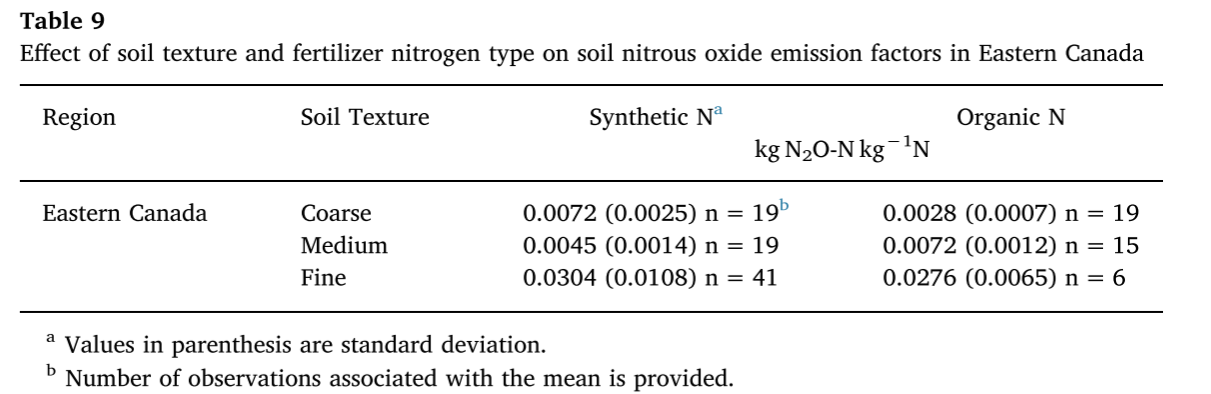

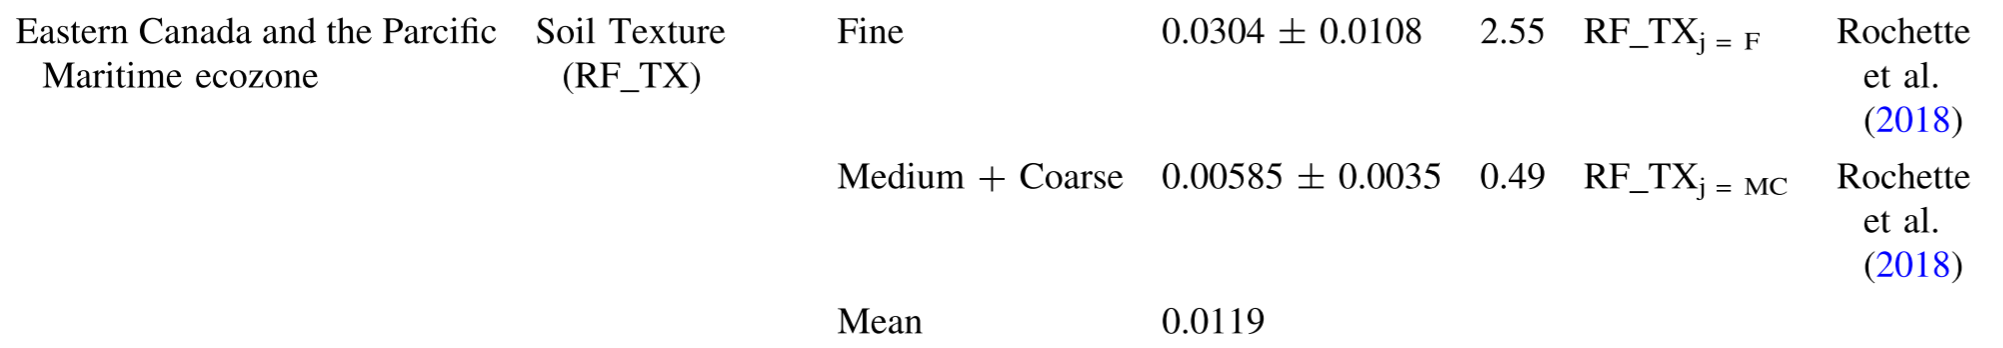

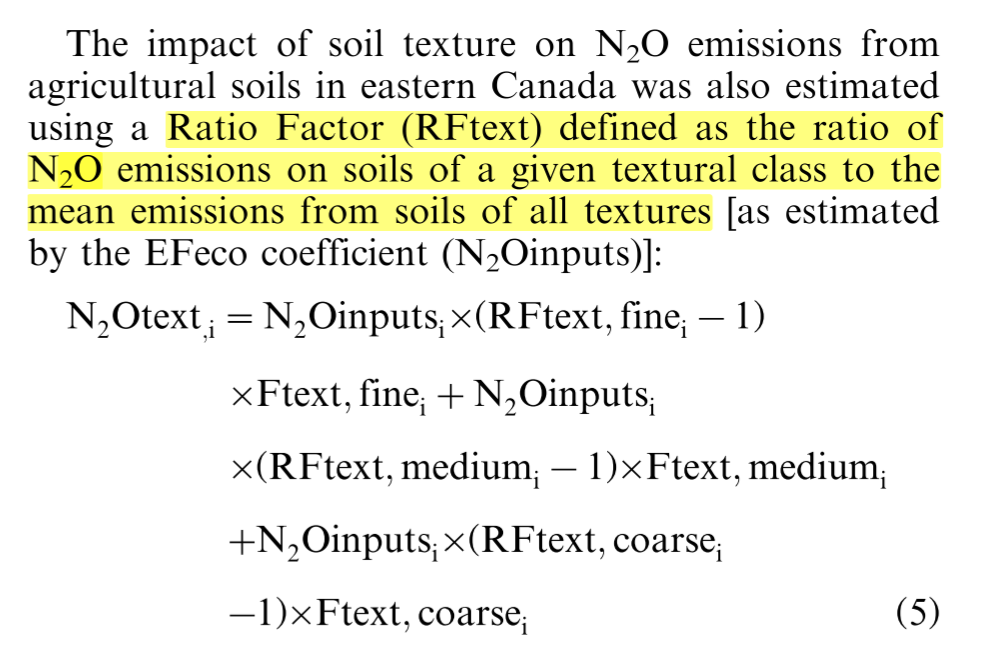

![](https://upload.wikimedia.org/wikipedia/commons/3/39/SoilTextureTriangle.svg)

In [150]:
from scipy import stats
import numpy as np


mean_fine = 0.0304
std_dev_fine = 0.0108
n_fine = 41

# standard error of the mean for Fine texture
sem_fine = std_dev_fine / np.sqrt(n_fine)

# 95% confidence interval for Fine texture
ci_fine = stats.norm.interval(0.95, loc=mean_fine, scale=sem_fine)

# Given values in Liang 2020
mean_mc = 0.00585
std_dev_mc = 0.0035
n_mc = 38  

sem_mc = std_dev_mc / np.sqrt(n_mc)
ci_mc = stats.norm.interval(0.95, loc=mean_mc, scale=sem_mc)
print("95% CI for Fine Texture:", ci_fine)
print("95% CI for Medium + Coarse Texture:", ci_mc)

95% CI for Fine Texture: (0.02709417455477654, 0.033705825445223464)
95% CI for Medium + Coarse Texture: (0.004737181499719802, 0.006962818500280198)


In [151]:
from scipy import stats
import numpy as np


mean_fine = 0.0304
std_dev_fine = 0.0108
n_fine = 41


sem_fine = std_dev_fine / np.sqrt(n_fine)
ci_fine = stats.norm.interval(0.99, loc=mean_fine, scale=sem_fine)

mean_mc = 0.00585
std_dev_mc = 0.0035
n_mc = 38  


sem_mc = std_dev_mc / np.sqrt(n_mc)
ci_mc = stats.norm.interval(0.99, loc=mean_mc, scale=sem_mc)
print("99% CI for Fine Texture:", ci_fine)
print("99% CI for Medium + Coarse Texture:", ci_mc)

99% CI for Fine Texture: (0.02605540891496409, 0.034744591085035914)
99% CI for Medium + Coarse Texture: (0.004387508584258123, 0.0073124914157418775)


In [152]:
rf_fine_99 = 0.034744591085035914/0.0119
rf_coarse_99 = 0.004387508584258123/0.0119

In [153]:
rf_tx = {
    'Clay': rf_fine_99 ,
    'Silt': 1,
    'Sand': rf_coarse_99
}

In [154]:
soil_rf_tx = {}
rf_tx_values = []
for soil, components in soil_textures.items():
    rf_value = 0
    for component, percentage in components.items():
        rf_component = rf_tx[component]
        rf_value += rf_component * (percentage / 100)
    soil_rf_tx[soil] = round(rf_value, 2)  # rounding to two decimal places for clarity

# Printing the calculated rf_tx values for each soil type
for soil, rf_value in soil_rf_tx.items():
    print(soil, "rf_tx:", rf_value)
    rf_tx_values.append(rf_value)

Clay (Heavy) rf_tx: 2.47
Silty Clay rf_tx: 1.9
Clay rf_tx: 1.77
Silty Clay Loam rf_tx: 1.48
Clay Loam rf_tx: 1.35
Silt rf_tx: 1.09
Silt Loam rf_tx: 1.18
Sandy Clay rf_tx: 1.62
Loam rf_tx: 1.05
Sandy Clay Loam rf_tx: 1.13
Sandy Loam rf_tx: 0.78
Loamy Sand rf_tx: 0.65
Sand rf_tx: 0.53


## Fitting line

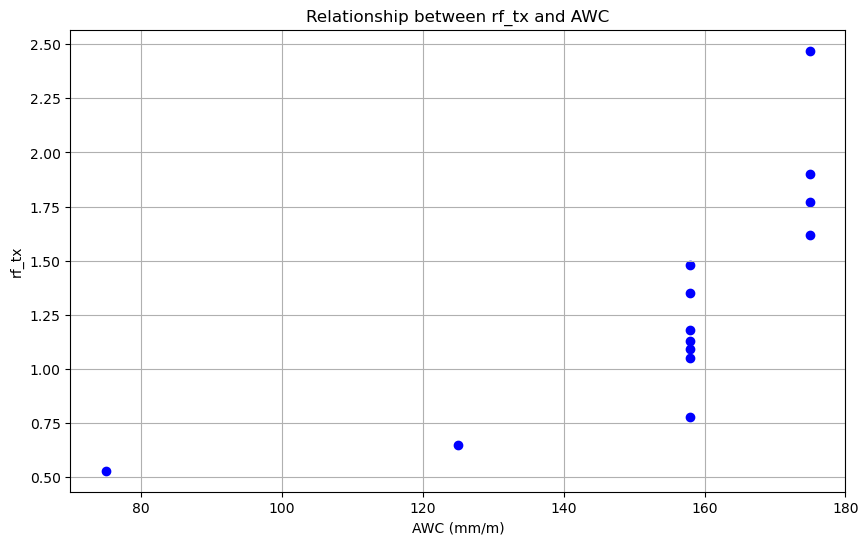

In [155]:
soil_types = ['Clay (Heavy)', 'Silty Clay', 'Clay', 'Silty Clay Loam', 'Clay Loam', 'Silt', 'Silt Loam', 'Sandy Clay', 'Loam', 'Sandy Clay Loam', 'Sandy Loam', 'Loamy Sand', 'Sand']
awc_values = [175, 175, 175, 158, 158, 158, 158, 175, 158, 158, 158, 125, 75]  # Based on the table provided

plt.figure(figsize=(10, 6))
plt.scatter(awc_values, rf_tx_values, color='b')
plt.title('Relationship between rf_tx and AWC')
plt.ylabel('rf_tx')
plt.xlabel('AWC (mm/m)')
plt.grid(True)

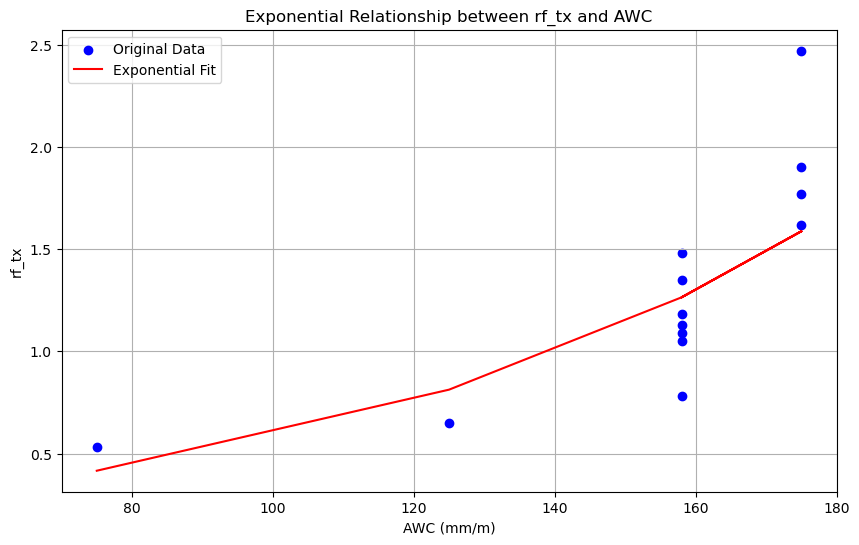

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
rf_tx_values = np.array(rf_tx_values)
awc_values = np.array([175, 175, 175, 158, 158, 158, 158, 175, 158, 158, 158, 125, 75])

# Log-transform AWC
log_rf_tx = np.log(rf_tx_values)

# Perform linear regression on the log-transformed AWC
slope, intercept = np.polyfit(awc_values, log_rf_tx, 1)
regression_line = np.exp(slope * awc_values + intercept)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(awc_values,rf_tx_values, color='blue', label='Original Data')
plt.plot(awc_values, regression_line, 'r-', label='Exponential Fit')
plt.title('Exponential Relationship between rf_tx and AWC')
plt.ylabel('rf_tx')
plt.xlabel('AWC (mm/m)')
plt.legend()
plt.grid(True)
plt.show()


## Output range

In [157]:
def calculate_rf_tx(clay, silt, sand):
    clay_per = clay/100
    silt_per = silt/100
    sand_per = sand/100
    return clay_per * rf_tx['Clay'] + silt_per * rf_tx['Silt'] + sand_per * rf_tx['Sand']


def generate_combinations(clay_range, silt_range, sand_range):
    possible_rf_tx_values = []
    for clay in range(clay_range[0], clay_range[1]+1, 1):  # step by 1% for simplicity
        for silt in range(silt_range[0], silt_range[1]+1, 1):
            sand = 100 - clay - silt
            if sand >= sand_range[0] and sand <= sand_range[1]:
                rf_tx_value = calculate_rf_tx(clay, silt, sand)
                possible_rf_tx_values.append(rf_tx_value)
    return min(possible_rf_tx_values), max(possible_rf_tx_values)


In [158]:
soil_textures_range = {
    "Clay (heavy)": {"Clay": (60, 100), "Silt": (0, 40), "Sand": (0, 40)},
    "Silty clay": {"Clay": (40, 60), "Silt": (40, 60), "Sand": (0, 20)},
    "Clay": {"Clay": (40, 60), "Silt": (0, 40), "Sand": (0, 45)},
    "Silty clay loam": {"Clay": (27, 40), "Silt": (20, 73), "Sand": (0, 20)},
    "Clay loam": {"Clay": (27, 40), "Silt": (0, 50), "Sand": (20, 45)},
    "Silt": {"Clay": (0, 12), "Silt": (80, 100), "Sand": (0, 20)},
    "Silt loam": {"Clay": (0, 27), "Silt": (50, 88), "Sand": (0, 50)},
    "Sandy clay": {"Clay": (35, 55), "Silt": (0, 20), "Sand": (45, 65)},
    "Loam": {"Clay": (7, 27), "Silt": (30, 50), "Sand": (23, 52)},
    "Sandy clay loam": {"Clay": (20, 35), "Silt": (0, 20), "Sand": (45, 80)},
    "Sandy loam": {"Clay": (0, 20), "Silt": (0, 50), "Sand": (43, 80)},
    "Loamy sand": {"Clay": (0, 15), "Silt": (0, 30), "Sand": (70, 100)},
    "Sand": {"Clay": (0, 10), "Silt": (0, 10), "Sand": (80, 100)}
}


rf_tx_ranges = {}
for soil, ranges in soil_textures_range.items():
    rf_tx_range = generate_combinations(ranges['Clay'], ranges['Silt'], ranges['Sand'])
    rf_tx_ranges[soil] = rf_tx_range

rf_tx_ranges

{'Clay (heavy)': (1.8993074020777139, 2.9197135365576394),
 'Silty clay': (1.641625054694621, 2.151828121934584),
 'Clay': (1.4837996047840771, 2.151828121934584),
 'Silty clay loam': (1.392062294942128, 1.7678854146230556),
 'Clay loam': (1.2342368450315844, 1.641625054694621),
 'Silt': (0.8737396400715651, 1.2303656243869168),
 'Silt loam': (0.6843491001789127, 1.5183226548705626),
 'Sandy clay': (1.2615535680277603, 1.7717566352677232),
 'Loam': (0.806103011745104, 1.3731232409528624),
 'Sandy clay loam': (0.8789012675977882, 1.3878139279561952),
 'Sandy loam': (0.49495856028626034, 1.1124829334653927),
 'Loamy sand': (0.3686982003578254, 0.8460457707341237),
 'Sand': (0.3686982003578254, 0.6869299139420243)}

## Read AWC from database

In [159]:
import pyodbc

In [160]:
mdb_path = '../data/external/fao_soil/HWSD2.mdb'

# Connection string
conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    r'DBQ=' + mdb_path + ';'
)

# Connect to the database
conn = pyodbc.connect(conn_str)

# Create a cursor
cursor = conn.cursor()

In [161]:
tables = [table.table_name for table in cursor.tables(tableType='TABLE')]
print("Tables in the database:", tables)

Tables in the database: ['D_ADD_PROP', 'D_AWC', 'D_COVERAGE', 'D_DRAINAGE', 'D_FAO90', 'D_IL', 'D_KOPPEN', 'D_PHASE', 'D_ROOT_DEPTH', 'D_ROOTS', 'D_SWR', 'D_TEXTURE', 'D_TEXTURE_SOTER', 'D_TEXTURE_USDA', 'D_WRB_PHASES', 'D_WRB2', 'D_WRB2code', 'D_WRB4', 'HWSD2_LAYERS', 'HWSD2_LAYERS_METADATA', 'HWSD2_SMU', 'HWSD2_SMU_METADATA', 'WRB_Class', 'WRB_Layer', 'WRB_Library']


In [162]:
query = 'SELECT * FROM HWSD2_SMU'

In [163]:
# df = pd.read_sql_query(query, conn)

In [164]:
conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    r'DBQ=' + mdb_path + ';'
)

conn = pyodbc.connect(conn_str)

cursor = conn.cursor()

query = 'SELECT * FROM HWSD2_SMU'

cursor.execute(query)

data = cursor.fetchall()

# Extract the column names from the cursor
columns = [column[0] for column in cursor.description]

# Create a DataFrame from the fetched data
df = pd.DataFrame.from_records(data, columns=columns)

# Display the first few rows of the DataFrame
# print(df.head())

# Close the cursor and connection
cursor.close()
conn.close()


In [165]:
df.columns

Index(['ID', 'HWSD2_SMU_ID', 'WISE30s_SMU_ID', 'HWSD1_SMU_ID', 'COVERAGE',
       'SHARE', 'WRB4', 'WRB_PHASES', 'WRB2', 'WRB2_CODE', 'FAO90', 'KOPPEN',
       'TEXTURE_USDA', 'REF_BULK_DENSITY', 'BULK_DENSITY', 'DRAINAGE',
       'ROOT_DEPTH', 'AWC', 'PHASE1', 'PHASE2', 'ROOTS', 'IL', 'ADD_PROP'],
      dtype='object')

In [166]:
awc_df = df[['TEXTURE_USDA', 'AWC']].dropna()

In [167]:
awc_df

,TEXTURE_USDA,AWC
0,11.0,168
1,7.0,152
2,7.0,152
3,7.0,152
4,7.0,152
...,...,...
29525,9.0,170
29526,9.0,170
29527,5.0,165
29528,5.0,165


In [173]:
mapping = {
    1: 'Clay (heavy)',
    2:"Silty clay",
    3:"Clay (light)",
    4:"Silty clay loam",
     5:"Clay loam",
     6:"Silt",
     7:"Silt loam",
     8:"Sandy clay",
     9:"Loam",
     10:"Sandy clay loam",
     11:"Sandy loam",
     12:"Loamy sand",
     13:"Sand",
}

In [179]:
awc_df['Soil_Type'] = awc_df['TEXTURE_USDA'].map(mapping)

In [183]:
 # Placeholder value, replace this with actual computation logic later
awc_df['rf_tx'] = 1.0 
awc_df.head()

,TEXTURE_USDA,AWC,Soil_Type,rf_tx
0,11.0,168,Sandy loam,1.0
1,7.0,152,Silt loam,1.0
2,7.0,152,Silt loam,1.0
3,7.0,152,Silt loam,1.0
4,7.0,152,Silt loam,1.0


In [184]:
soil_textures_range = {
    "Clay (heavy)": {"Clay": (60, 100), "Silt": (0, 40), "Sand": (0, 40)},
    "Silty clay": {"Clay": (40, 60), "Silt": (40, 60), "Sand": (0, 20)},
    "Clay (light)": {"Clay": (40, 60), "Silt": (0, 40), "Sand": (0, 45)},
    "Silty clay loam": {"Clay": (27, 40), "Silt": (20, 73), "Sand": (0, 20)},
    "Clay loam": {"Clay": (27, 40), "Silt": (0, 50), "Sand": (20, 45)},
    "Silt": {"Clay": (0, 12), "Silt": (80, 100), "Sand": (0, 20)},
    "Silt loam": {"Clay": (0, 27), "Silt": (50, 88), "Sand": (0, 50)},
    "Sandy clay": {"Clay": (35, 55), "Silt": (0, 20), "Sand": (45, 65)},
    "Loam": {"Clay": (7, 27), "Silt": (30, 50), "Sand": (23, 52)},
    "Sandy clay loam": {"Clay": (20, 35), "Silt": (0, 20), "Sand": (45, 80)},
    "Sandy loam": {"Clay": (0, 20), "Silt": (0, 50), "Sand": (43, 80)},
    "Loamy sand": {"Clay": (0, 15), "Silt": (0, 30), "Sand": (70, 100)},
    "Sand": {"Clay": (0, 10), "Silt": (0, 10), "Sand": (80, 100)}
}


# Calculate and print rf_tx range for each soil type
rf_tx_ranges = {}
for soil, ranges in soil_textures_range.items():
    rf_tx_range = generate_combinations(ranges['Clay'], ranges['Silt'], ranges['Sand'])
    rf_tx_ranges[soil] = rf_tx_range

# Display the results
for soil, rf_tx_range in rf_tx_ranges.items():
    print(f"{soil}: rf_tx range is {rf_tx_range}")

Clay (heavy): rf_tx range is (1.8993074020777139, 2.9197135365576394)
Silty clay: rf_tx range is (1.641625054694621, 2.151828121934584)
Clay (light): rf_tx range is (1.4837996047840771, 2.151828121934584)
Silty clay loam: rf_tx range is (1.392062294942128, 1.7678854146230556)
Clay loam: rf_tx range is (1.2342368450315844, 1.641625054694621)
Silt: rf_tx range is (0.8737396400715651, 1.2303656243869168)
Silt loam: rf_tx range is (0.6843491001789127, 1.5183226548705626)
Sandy clay: rf_tx range is (1.2615535680277603, 1.7717566352677232)
Loam: rf_tx range is (0.806103011745104, 1.3731232409528624)
Sandy clay loam: rf_tx range is (0.8789012675977882, 1.3878139279561952)
Sandy loam: rf_tx range is (0.49495856028626034, 1.1124829334653927)
Loamy sand: rf_tx range is (0.3686982003578254, 0.8460457707341237)
Sand: rf_tx range is (0.3686982003578254, 0.6869299139420243)


In [192]:
def median_value(value_range):
    """ Calculate the median of a given range. """
    return (value_range[0] + value_range[1]) / 2

def calculate_soil_compositions(soil_textures_range):
    results = {}
    clay_soils = ["Clay (heavy)", 
                    "Silty clay",
                    "Clay (light)",
                    "Silty clay loam", 
                    "Clay loam", 
                    'Sandy clay']
    silt_soils = {
                        "Silt", 
                        "Silt loam",
                        'Loam'
                        'Sandy clay loam',
    }

    for soil, ranges in soil_textures_range.items():
        # Calculate medians for each component
        medians = {component: median_value(range) for component, range in ranges.items()}

        if soil in clay_soils:
            # Clay and silt are prioritized, sand is the residual
            prioritized = {k: medians[k] for k in ['Clay', 'Silt'] if k in medians}
            residual = "Sand"
        elif soil in silt_soils: 
            prioritized = {k: medians[k] for k in ['Silt', 'Clay'] if k in medians}
            residual = "Sand"
        else:
            # Sand and silt are prioritized, clay is the residual
            prioritized = {k: medians[k] for k in ['Sand', 'Clay'] if k in medians}
            residual = "Silt"

        # Calculate the sum of prioritized components
        total_prioritized = sum(prioritized.values())
        residual_value = max(0, 100 - total_prioritized)  # Ensure non-negative residual

        # Assign the residual value
        prioritized[residual] = residual_value

        # Normalize to ensure they sum exactly to 100 due to rounding errors in calculation
        total = sum(prioritized.values())
        normalized = {k: (v / total) * 100 for k, v in prioritized.items()}
        
        results[soil] = normalized

    return results

# Define your soil texture ranges as before
soil_textures_range = {
    "Clay (heavy)": {"Clay": (60, 100), "Silt": (0, 40), "Sand": (0, 40)},
    "Silty clay": {"Clay": (40, 60), "Silt": (40, 60), "Sand": (0, 20)},
    "Clay (light)": {"Clay": (40, 60), "Silt": (0, 40), "Sand": (0, 45)},
    "Silty clay loam": {"Clay": (27, 40), "Silt": (20, 73), "Sand": (0, 20)},
    "Clay loam": {"Clay": (27, 40), "Silt": (0, 50), "Sand": (20, 45)},
    "Silt": {"Clay": (0, 12), "Silt": (80, 100), "Sand": (0, 20)},
    "Silt loam": {"Clay": (0, 27), "Silt": (50, 88), "Sand": (0, 50)},
    "Sandy clay": {"Clay": (35, 55), "Silt": (0, 20), "Sand": (45, 65)},
    "Loam": {"Clay": (7, 27), "Silt": (30, 50), "Sand": (23, 52)},
    "Sandy clay loam": {"Clay": (20, 35), "Silt": (0, 20), "Sand": (45, 80)},
    "Sandy loam": {"Clay": (0, 20), "Silt": (0, 50), "Sand": (43, 80)},
    "Loamy sand": {"Clay": (0, 15), "Silt": (0, 30), "Sand": (70, 100)},
    "Sand": {"Clay": (0, 10), "Silt": (0, 10), "Sand": (80, 100)}
}
# soil_textures_range = {
#     "Clay (heavy)": {"Clay": (60, 100), "Silt": (0, 40), "Sand": (0, 20)},
#     "Silty clay": {"Clay": (40, 60), "Silt": (40, 60), "Sand": (0, 20)},
#     "Clay": {"Clay": (40, 60), "Silt": (0, 40), "Sand": (0, 45)},
#     "Silty clay loam": {"Clay": (27, 40), "Silt": (27, 73), "Sand": (0, 20)},
#     "Clay loam": {"Clay": (27, 40), "Silt": (27, 50), "Sand": (20, 45)},
#     "Silt": {"Clay": (0, 12), "Silt": (88, 100), "Sand": (0, 20)},
#     "Silt loam": {"Clay": (0, 27), "Silt": (50, 88), "Sand": (0, 50)},
#     "Sandy clay": {"Clay": (35, 55), "Silt": (0, 20), "Sand": (45, 65)},
#     "Loam": {"Clay": (7, 27), "Silt": (28, 50), "Sand": (23, 52)},
#     "Sandy clay loam": {"Clay": (20, 35), "Silt": (0, 20), "Sand": (45, 65)},
#     "Sandy loam": {"Clay": (0, 20), "Silt": (0, 50), "Sand": (50, 80)},
#     "Loamy sand": {"Clay": (0, 15), "Silt": (0, 30), "Sand": (70, 85)},
#     "Sand": {"Clay": (0, 10), "Silt": (0, 10), "Sand": (85, 100)}
# }
# Calculate and print the results
soil_compositions


{'Clay (heavy)': {'Clay': 80.0, 'Silt': 20.0, 'Sand': 0.0},
 'Silty clay': {'Clay': 50.0, 'Silt': 50.0, 'Sand': 0.0},
 'Clay (light)': {'Clay': 50.0, 'Silt': 20.0, 'Sand': 30.0},
 'Silty clay loam': {'Clay': 33.5, 'Silt': 46.5, 'Sand': 20.0},
 'Clay loam': {'Clay': 33.5, 'Silt': 25.0, 'Sand': 41.5},
 'Silt': {'Silt': 90.0, 'Clay': 6.0, 'Sand': 4.0},
 'Silt loam': {'Silt': 69.0, 'Clay': 13.5, 'Sand': 17.5},
 'Sandy clay': {'Clay': 45.0, 'Silt': 10.0, 'Sand': 45.0},
 'Loam': {'Sand': 37.5, 'Clay': 17.0, 'Silt': 45.5},
 'Sandy clay loam': {'Sand': 62.5, 'Clay': 27.500000000000004, 'Silt': 10.0},
 'Sandy loam': {'Sand': 61.5, 'Clay': 10.0, 'Silt': 28.499999999999996},
 'Loamy sand': {'Sand': 85.0, 'Clay': 7.5, 'Silt': 7.5},
 'Sand': {'Sand': 90.0, 'Clay': 5.0, 'Silt': 5.0}}

In [196]:
rf_tx_values = {
    'Clay': rf_fine_99,
    'Silt': 1.00,
    'Sand': rf_coarse_99
}
def calculate_rf_tx(soil_compositions):
    results = {}
    for soil, composition in soil_compositions.items():
        clay_pct = composition['Clay']
        silt_pct = composition['Silt']
        sand_pct = composition['Sand']

        # Calculate rf_tx using the exact values
        rf_tx = (clay_pct * rf_tx_values['Clay'] + 
                 silt_pct * rf_tx_values['Silt'] + 
                 sand_pct * rf_tx_values['Sand']) / 100

        results[soil] = rf_tx

    return results

# Calculate and print the rf_tx values
rf_tx_results = calculate_rf_tx(soil_compositions )
for soil, rf_tx in rf_tx_results.items():
    print(f"{soil}: {rf_tx:.2f}")

Clay (heavy): 2.54
Silty clay: 1.96
Clay (light): 1.77
Silty clay loam: 1.52
Clay loam: 1.38
Silt: 1.09
Silt loam: 1.15
Sandy clay: 1.58
Loam: 1.09
Sandy clay loam: 1.13
Sandy loam: 0.80
Loamy sand: 0.61
Sand: 0.53


In [197]:
rf_tx_results 

{'Clay (heavy)': 2.5357708292461116,
 'Silty clay': 1.9598567682788197,
 'Clay (light)': 1.7704662283861674,
 'Silty clay loam': 1.5168436748183742,
 'Clay loam': 1.3811137878953068,
 'Silt': 1.0899307402077714,
 'Silt loam': 1.1486835124979007,
 'Sandy clay': 1.5797852816119593,
 'Loam': 1.0896131263489834,
 'Sandy clay loam': 1.1333575977769919,
 'Sandy loam': 0.8037207468758265,
 'Loamy sand': 0.6073719855459746,
 'Sand': 0.5278140571499249}

In [200]:
awc_df['rf_tx'] = awc_df['Soil_Type'].map(rf_tx_results)
awc_df.head()

,TEXTURE_USDA,AWC,Soil_Type,rf_tx
0,11.0,168,Sandy loam,0.803721
1,7.0,152,Silt loam,1.148684
2,7.0,152,Silt loam,1.148684
3,7.0,152,Silt loam,1.148684
4,7.0,152,Silt loam,1.148684


In [201]:
summary = awc_df.groupby('AWC')['rf_tx'].mean().to_frame().reset_index()

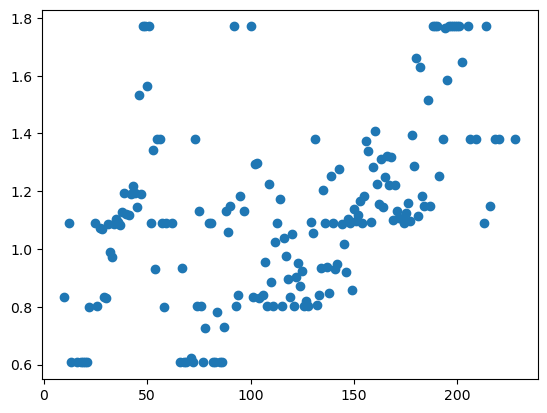

In [202]:
plt.scatter(summary['AWC'], summary['rf_tx'])

In [ ]:
def median_value(value_range):
    """ Calculate the median of a given range. """
    return (value_range[0] + value_range[1]) / 2

def calculate_soil_compositions(soil_textures_range):
    results = {}
    clay_soils = ["Clay (heavy)", 
                    "Silty clay",
                    "Clay (light)",
                    "Silty clay loam", 
                    "Clay loam", 
                    'Sandy clay']
    silt_soils = {
                        "Silt", 
                        "Silt loam",
                        'Loam'
                        'Sandy clay loam',
    }

    for soil, ranges in soil_textures_range.items():
        # Calculate medians for each component
        medians = {component: median_value(range) for component, range in ranges.items()}

        if soil in clay_soils:
            # Clay and silt are prioritized, sand is the residual
            prioritized = {k: medians[k] for k in ['Clay', 'Silt'] if k in medians}
            residual = "Sand"
        elif soil in silt_soils: 
            prioritized = {k: medians[k] for k in ['Silt', 'Clay'] if k in medians}
            residual = "Sand"
        else:
            # Sand and silt are prioritized, clay is the residual
            prioritized = {k: medians[k] for k in ['Sand', 'Clay'] if k in medians}
            residual = "Silt"

        # Calculate the sum of prioritized components
        total_prioritized = sum(prioritized.values())
        residual_value = max(0, 100 - total_prioritized)  # Ensure non-negative residual

        # Assign the residual value
        prioritized[residual] = residual_value

        # Normalize to ensure they sum exactly to 100 due to rounding errors in calculation
        total = sum(prioritized.values())
        normalized = {k: (v / total) * 100 for k, v in prioritized.items()}
        
        results[soil] = normalized

    return results

# Define your soil texture ranges as before
soil_textures_range = {
    "Clay (heavy)": {"Clay": (60, 100), "Silt": (0, 40), "Sand": (0, 40)},
    "Silty clay": {"Clay": (40, 60), "Silt": (40, 60), "Sand": (0, 20)},
    "Clay (light)": {"Clay": (40, 60), "Silt": (0, 40), "Sand": (0, 45)},
    "Silty clay loam": {"Clay": (27, 40), "Silt": (20, 73), "Sand": (0, 20)},
    "Clay loam": {"Clay": (27, 40), "Silt": (0, 50), "Sand": (20, 45)},
    "Silt": {"Clay": (0, 12), "Silt": (80, 100), "Sand": (0, 20)},
    "Silt loam": {"Clay": (0, 27), "Silt": (50, 88), "Sand": (0, 50)},
    "Sandy clay": {"Clay": (35, 55), "Silt": (0, 20), "Sand": (45, 65)},
    "Loam": {"Clay": (7, 27), "Silt": (30, 50), "Sand": (23, 52)},
    "Sandy clay loam": {"Clay": (20, 35), "Silt": (0, 20), "Sand": (45, 80)},
    "Sandy loam": {"Clay": (0, 20), "Silt": (0, 50), "Sand": (43, 80)},
    "Loamy sand": {"Clay": (0, 15), "Silt": (0, 30), "Sand": (70, 100)},
    "Sand": {"Clay": (0, 10), "Silt": (0, 10), "Sand": (80, 100)}
}
# soil_textures_range = {
#     "Clay (heavy)": {"Clay": (60, 100), "Silt": (0, 40), "Sand": (0, 20)},
#     "Silty clay": {"Clay": (40, 60), "Silt": (40, 60), "Sand": (0, 20)},
#     "Clay": {"Clay": (40, 60), "Silt": (0, 40), "Sand": (0, 45)},
#     "Silty clay loam": {"Clay": (27, 40), "Silt": (27, 73), "Sand": (0, 20)},
#     "Clay loam": {"Clay": (27, 40), "Silt": (27, 50), "Sand": (20, 45)},
#     "Silt": {"Clay": (0, 12), "Silt": (88, 100), "Sand": (0, 20)},
#     "Silt loam": {"Clay": (0, 27), "Silt": (50, 88), "Sand": (0, 50)},
#     "Sandy clay": {"Clay": (35, 55), "Silt": (0, 20), "Sand": (45, 65)},
#     "Loam": {"Clay": (7, 27), "Silt": (28, 50), "Sand": (23, 52)},
#     "Sandy clay loam": {"Clay": (20, 35), "Silt": (0, 20), "Sand": (45, 65)},
#     "Sandy loam": {"Clay": (0, 20), "Silt": (0, 50), "Sand": (50, 80)},
#     "Loamy sand": {"Clay": (0, 15), "Silt": (0, 30), "Sand": (70, 85)},
#     "Sand": {"Clay": (0, 10), "Silt": (0, 10), "Sand": (85, 100)}
# }
# Calculate and print the results
soil_compositions = calculate_soil_compositions(soil_textures_range)
for soil, composition in soil_compositions.items():
    print(f"{soil}: {composition}")


Clay (heavy): {'Clay': 80.0, 'Silt': 20.0, 'Sand': 0.0}
Silty clay: {'Clay': 50.0, 'Silt': 50.0, 'Sand': 0.0}
Clay (light): {'Clay': 50.0, 'Silt': 20.0, 'Sand': 30.0}
Silty clay loam: {'Clay': 33.5, 'Silt': 46.5, 'Sand': 20.0}
Clay loam: {'Clay': 33.5, 'Silt': 25.0, 'Sand': 41.5}
Silt: {'Silt': 90.0, 'Clay': 6.0, 'Sand': 4.0}
Silt loam: {'Silt': 69.0, 'Clay': 13.5, 'Sand': 17.5}
Sandy clay: {'Clay': 45.0, 'Silt': 10.0, 'Sand': 45.0}
Loam: {'Sand': 37.5, 'Clay': 17.0, 'Silt': 45.5}
Sandy clay loam: {'Sand': 62.5, 'Clay': 27.500000000000004, 'Silt': 10.0}
Sandy loam: {'Sand': 61.5, 'Clay': 10.0, 'Silt': 28.499999999999996}
Loamy sand: {'Sand': 85.0, 'Clay': 7.5, 'Silt': 7.5}
Sand: {'Sand': 90.0, 'Clay': 5.0, 'Silt': 5.0}


In [ ]:
rf_tx_values = {
    'Fine': rf_fine_99,
    'Medium': 1.00,
    'Coarse': rf_coarse_99
}
def calculate_rf_tx(soil_compositions):
    results = {}
    for soil, composition in soil_compositions.items():
        clay_pct = composition['Clay']
        silt_pct = composition['Silt']
        sand_pct = composition['Sand']

        # Calculate rf_tx using the exact values
        rf_tx = (clay_pct * rf_tx_values['Fine'] + 
                 silt_pct * rf_tx_values['Medium'] + 
                 sand_pct * rf_tx_values['Coarse']) / 100

        results[soil] = rf_tx

    return results

# Calculate and print the rf_tx values
rf_tx_results = calculate_rf_tx(soil_compositions )
for soil, rf_tx in rf_tx_results.items():
    print(f"{soil}: {rf_tx:.2f}")

Clay (heavy): 2.54
Silty clay: 1.96
Clay (light): 1.77
Silty clay loam: 1.52
Clay loam: 1.38
Silt: 1.09
Silt loam: 1.15
Sandy clay: 1.58
Loam: 1.09
Sandy clay loam: 1.13
Sandy loam: 0.80
Loamy sand: 0.61
Sand: 0.53


In [ ]:
def median_value(value_range):
    """ Calculate the median of a given range. """
    return (value_range[0] + value_range[1]) / 2

def calculate_soil_compositions(soil_textures_range):
    results = {}
    clay_soils = ["Clay (heavy)", 
                    "Silty clay",
                    "Clay (light)",
                    "Silty clay loam", 
                    "Clay loam", 
                    'Sandy clay']
    silt_soils = {
                        "Silt", 
                        "Silt loam",
                        'Loam'
                        'Sandy clay loam',
    }

    for soil, ranges in soil_textures_range.items():
        # Calculate medians for each component
        medians = {component: median_value(range) for component, range in ranges.items()}

        if soil in clay_soils:
            # Clay and silt are prioritized, sand is the residual
            prioritized = {k: medians[k] for k in ['Clay', 'Silt'] if k in medians}
            residual = "Sand"
        elif soil in silt_soils: 
            prioritized = {k: medians[k] for k in ['Silt', 'Clay'] if k in medians}
            residual = "Sand"
        else:
            # Sand and silt are prioritized, clay is the residual
            prioritized = {k: medians[k] for k in ['Sand', 'Clay'] if k in medians}
            residual = "Silt"

        # Calculate the sum of prioritized components
        total_prioritized = sum(prioritized.values())
        residual_value = max(0, 100 - total_prioritized)  # Ensure non-negative residual

        # Assign the residual value
        prioritized[residual] = residual_value

        # Normalize to ensure they sum exactly to 100 due to rounding errors in calculation
        total = sum(prioritized.values())
        normalized = {k: (v / total) * 100 for k, v in prioritized.items()}
        
        results[soil] = normalized

    return results

In [ ]:
def calculate_rf_tx(clay, silt, sand):
    clay_per = clay/100
    silt_per = silt/100
    sand_per = sand/100
    return clay_per * rf_tx_values['Fine'] + silt_per * rf_tx_values['Medium'] + sand_per * rf_tx_values['Coarse']

# Function to generate all possible percentage combinations for a given soil type
def generate_combinations(clay_range, silt_range, sand_range):
    possible_rf_tx_values = []
    for clay in range(clay_range[0], clay_range[1]+1, 1):  # step by 5% for simplicity
        for silt in range(silt_range[0], silt_range[1]+1, 1):
            sand = 100 - clay - silt
            if sand >= sand_range[0] and sand <= sand_range[1]:
                rf_tx_value = calculate_rf_tx(clay, silt, sand)
                possible_rf_tx_values.append(rf_tx_value)
    return min(possible_rf_tx_values), max(possible_rf_tx_values)


In [ ]:
rf_tx_ranges = {}
for soil, ranges in soil_textures_range.items():
    rf_tx_range = generate_combinations(ranges['Clay'], ranges['Silt'], ranges['Sand'])
    rf_tx_ranges[soil] = rf_tx_range

# Display the results
for soil, rf_tx_range in rf_tx_ranges.items():
    print(f"{soil}: rf_tx range is {rf_tx_range}")

Clay (heavy): rf_tx range is (1.8993074020777139, 2.9197135365576394)
Silty clay: rf_tx range is (1.641625054694621, 2.151828121934584)
Clay (light): rf_tx range is (1.4837996047840771, 2.151828121934584)
Silty clay loam: rf_tx range is (1.392062294942128, 1.7678854146230556)
Clay loam: rf_tx range is (1.2342368450315844, 1.641625054694621)
Silt: rf_tx range is (0.8737396400715651, 1.2303656243869168)
Silt loam: rf_tx range is (0.6843491001789127, 1.5183226548705626)
Sandy clay: rf_tx range is (1.2615535680277603, 1.7717566352677232)
Loam: rf_tx range is (0.806103011745104, 1.3731232409528624)
Sandy clay loam: rf_tx range is (0.8789012675977882, 1.3878139279561952)
Sandy loam: rf_tx range is (0.49495856028626034, 1.1124829334653927)
Loamy sand: rf_tx range is (0.3686982003578254, 0.8460457707341237)
Sand: rf_tx range is (0.3686982003578254, 0.6869299139420243)
